In [1]:
import numpy as np
import matplotlib.pyplot as plt

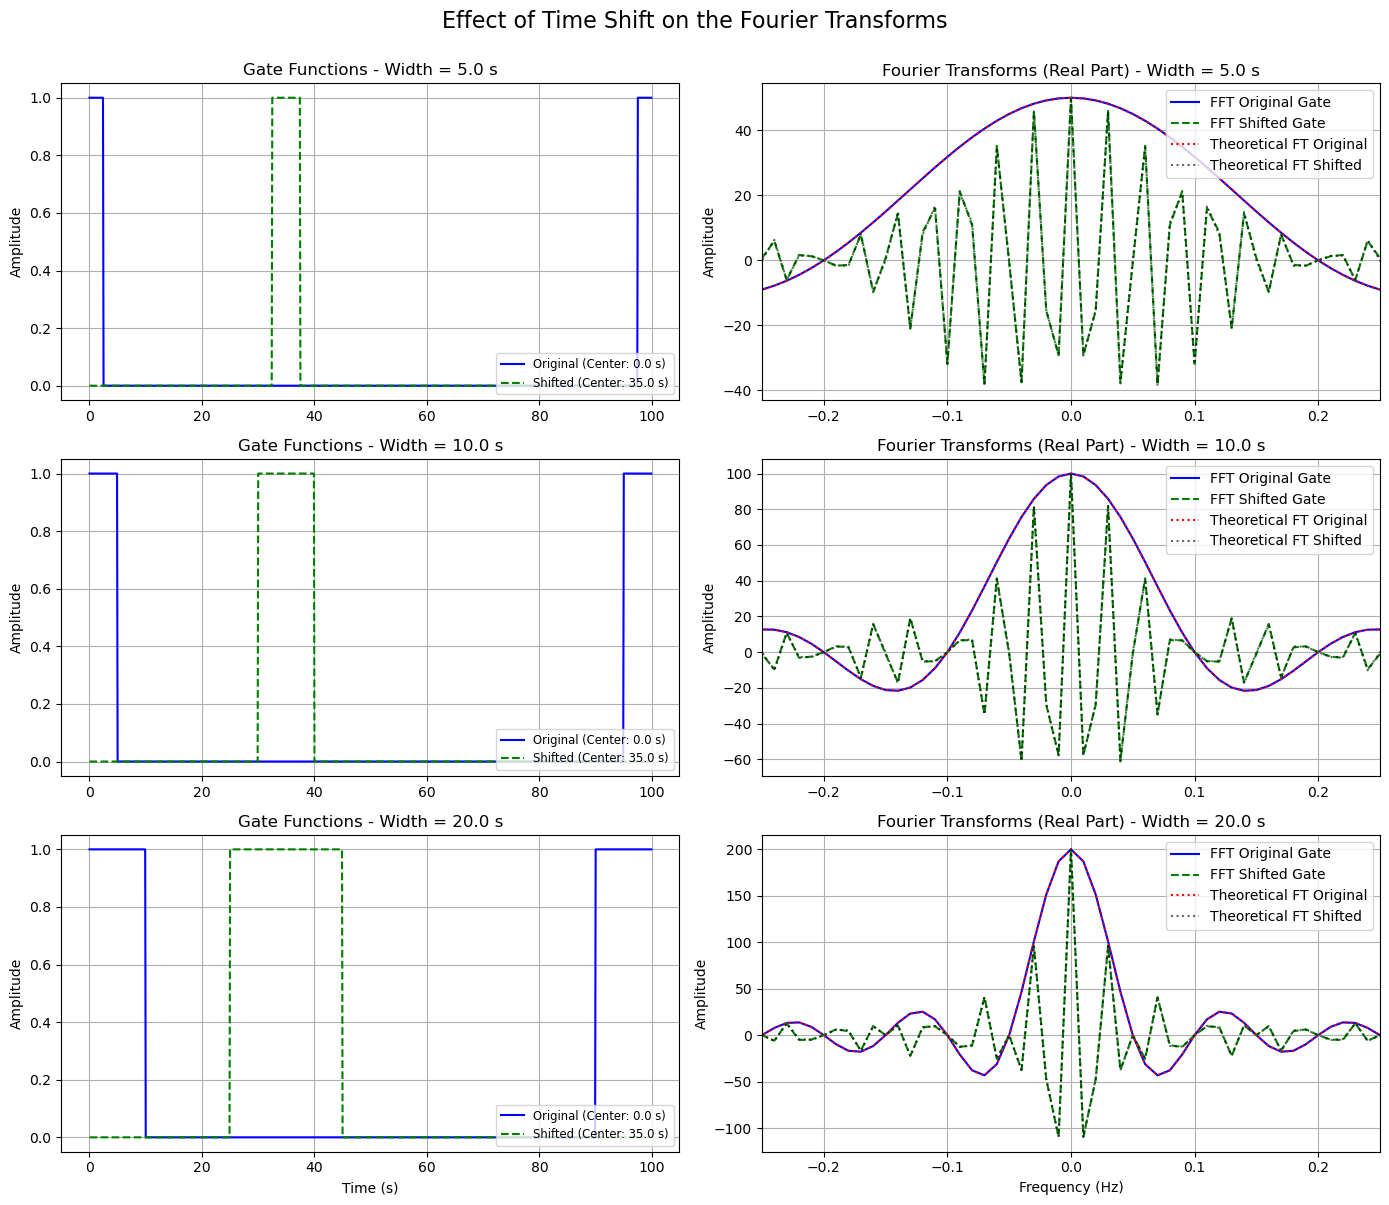

In [9]:
# SIGNAL PARAMETERS
Fs = 10 # Sampling Frequency (Hz)
T = 100.0 # Signal Duration (seconds)
N = int(Fs*T) # Total number of samples
SHIFT = 35.0 # Time shift for the second gate (seconds)

# Time - From 0.0 to T
t = np.linspace(0.0, T, N, endpoint=False) 

# Frequencies
frequencies = np.fft.fftfreq(N, 1/Fs)
frequencies_shifted = np.fft.fftshift(frequencies) # Organize frequencies for a better visualization

# Gates width
gate_width = [5.0, 10.0, 20.0] 

# Define Gate Function
def gate_function(width = 5.0, center = 0.0):
    a = np.zeros(N)
    a[0:int(Fs*width/2)] = 1.0
    a[N-int(Fs*width/2):N] = 1.0
    b = int(center*Fs)
    a = np.roll(a, b)
    return a

# COMPUTE GATE FUNCTIONS AND THEIR FFT
gates_data = [] # To save all the data for each width

for width in gate_width:
    # 1. Create original gate function (centered at T/2)
    gate = gate_function(width, center = 0)

    # 2. Create shifted gate function (centered at T/2 + SHIFT)
    gate_shifted = gate_function(width, center = SHIFT)
    
    # 3. Compute FFTs
    
    # FFT of the original gate
    fft_original = np.fft.fft(gate)
    fft_original_shifted = np.real(np.fft.fftshift(fft_original)) # Real part of the FFT
    
    # FFT of the shifted gate
    fft_shifted_gate = np.fft.fft(gate_shifted)
    fft_shifted_gate_shifted = np.real(np.fft.fftshift(fft_shifted_gate)) # Real part of the FFT
    
    # 4. Stores result
    gates_data.append({
        'width': width,
        'gate_original': gate,
        'gate_shifted': gate_shifted,
        'fft_original': fft_original_shifted,
        'fft_shifted_gate': fft_shifted_gate_shifted
    })

def FT_Theo(f, width, shift = 0.0):
    sinc_magnitude = width * np.sinc(f * width) # Magnitude 
    phase_factor = np.exp(-1j * 2 * np.pi * f * shift)  # Phase factor
    
    return Fs*sinc_magnitude*phase_factor

# PLOTTING
# Creating the figure with 3 rows (3 widths) and 2 columns (gate functions and their FFT)
n_plots = len(gate_width)
plt.figure(figsize=(14, 4 * n_plots))

for i, data in enumerate(gates_data):
    width = data['width']
    
    # LEFT HAND SIDE (GATE FUNCTIONS)

    plt.subplot(n_plots, 2, 2*i + 1)
    
    plt.plot(t, data['gate_original'], label=f'Original (Center: {0.0} s)', color='blue') # Original Gate
    plt.plot(t, data['gate_shifted'], label=f'Shifted (Center: {SHIFT} s)', color='green', linestyle='--') # Shifted Gate
    #plt.xlim([10, 90]) 
    plt.title(f'Gate Functions - Width = {width} s')
    if i == n_plots - 1: # X label only in the last subplot
        plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend(loc='lower right', fontsize = 'small')
    
    # RIGTH HAND SIDE (FFTs)
    
    plt.subplot(n_plots, 2, 2*i + 2)
    
    plt.plot(frequencies_shifted, data['fft_original'], label=f'FFT Original Gate', color='blue') # FFT of the original gate
    plt.plot(frequencies_shifted, data['fft_shifted_gate'], label=f'FFT Shifted Gate', color='green', linestyle='--') # FFT of the shifted gate
    plt.plot(frequencies_shifted, np.real(FT_Theo(frequencies_shifted, width, 0.0)), label='Theoretical FT Original', color='red', linestyle=':') # Theoretical curve original
    plt.plot(frequencies_shifted, np.real(FT_Theo(frequencies_shifted, width, SHIFT)), label='Theoretical FT Shifted', color='black', linestyle=':', alpha = 0.6) # Theoretical curve shifted
    plt.xlim([-0.25, 0.25]) 
    plt.title(f'Fourier Transforms (Real Part) - Width = {width} s')
    if i == n_plots - 1:
        plt.xlabel('Frequency (Hz)') # X label only in the last subplot
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend(loc='upper right')

    

plt.suptitle('Effect of Time Shift on the Fourier Transforms', fontsize=16, y=1)
plt.tight_layout()
plt.savefig('gate_analysis')
plt.show()

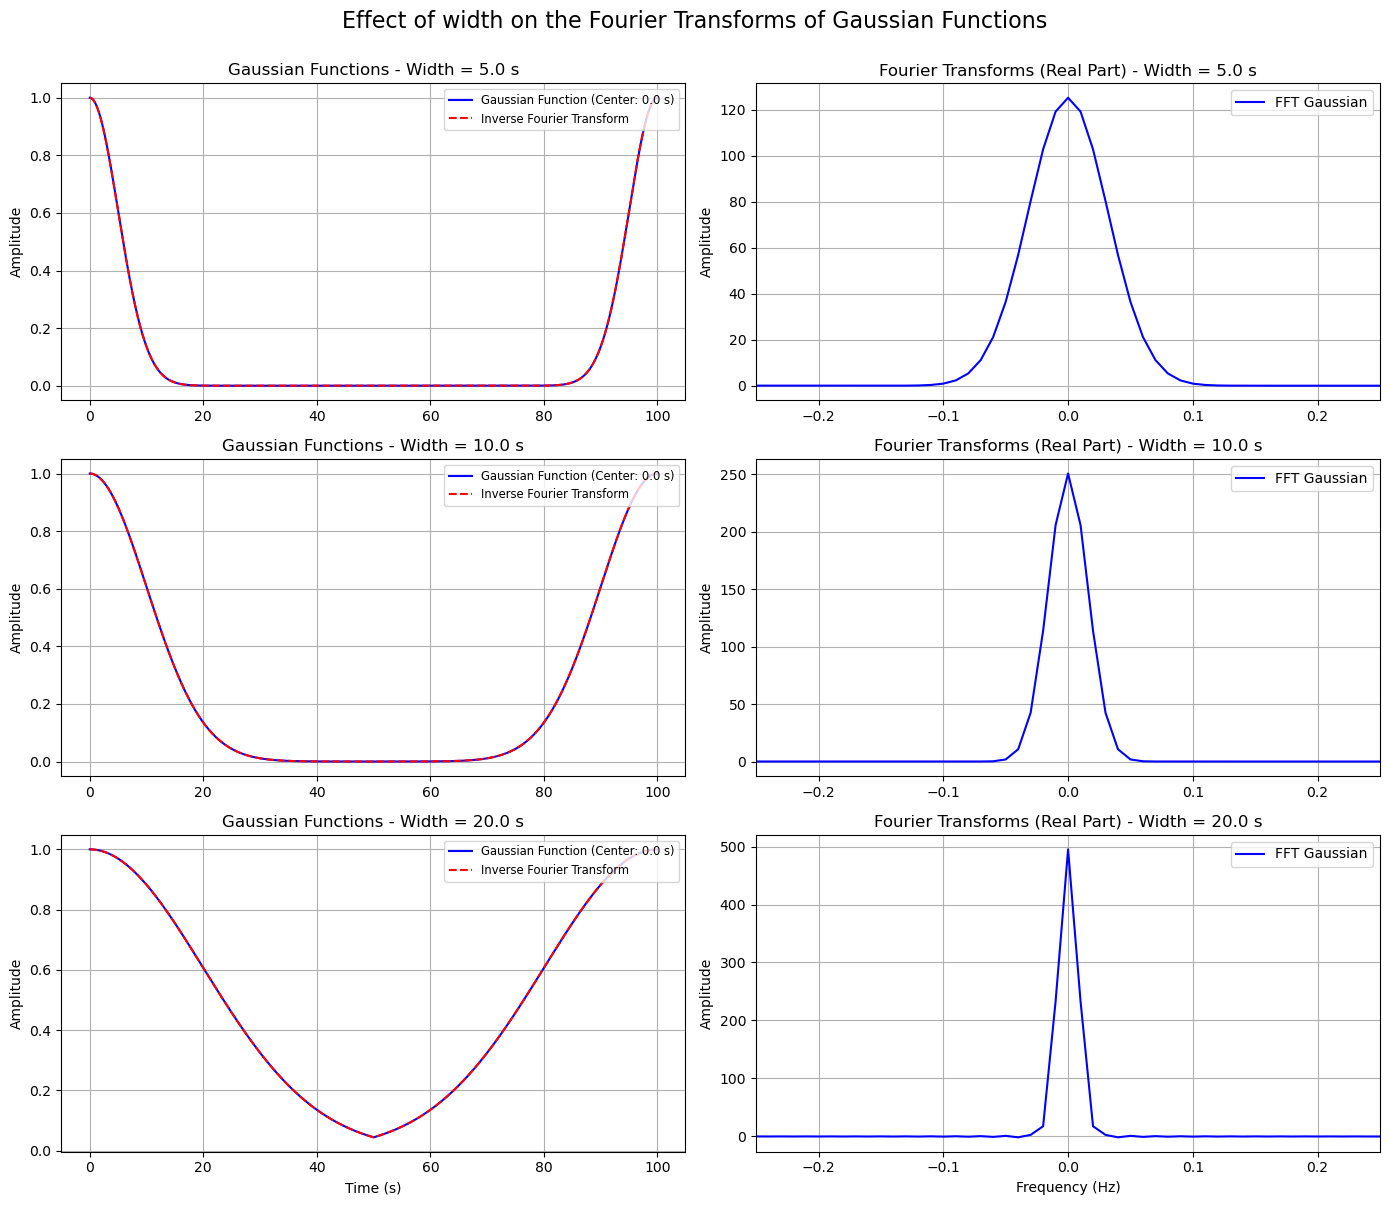

In [11]:
# SIGNAL PARAMETERS
Fs = 10 # Sampling Frequency (Hz)
T = 100.0 # Signal Duration (seconds)
N = int(Fs*T) # Total number of samples
SHIFT = T/2 # Time shift for the second gate (seconds)

# Time - From 0.0 to T
t = np.linspace(0.0, T, N, endpoint=False) 

# Frequencies
frequencies = np.fft.fftfreq(N, 1/Fs)
frequencies_shifted = np.fft.fftshift(frequencies) # Organize frequencies for a better visualization

# Gates width
gaussian_width = [5.0, 10.0, 20.0] #Sigma Parameter

# Define Gaussian Function
def gaussian_function(t, width = 5.0, center = 0.0):
    a = np.exp(-((t - T/2)**2) / (2 * width**2)) #Gaussian with Amplitud = 1
    b = int((center + T/2)*Fs)
    a = np.roll(a, b)
    return a

# COMPUTE GAUSSIAN FUNCTIONS AND THEIR FFT
data = [] # To save all the data for each width

for width in gaussian_width:
    # 1. Create original gaussian function (centered at 0.0)
    gaussian = gaussian_function(t, width)

    # 2. Create shifted gate function (centered at T/2 + SHIFT)
    #gaussian_shifted = gaussian_function(t, width, center = SHIFT)
    
    # 3. Compute FFT
    
    # FFT of the gaussian
    fft_gaussian = np.fft.fft(gaussian)
    fft_gaussian_shifted = np.real(np.fft.fftshift(fft_gaussian)) # Real part of the FFT

    # 4. Compute Inverse of FFT

    ifft_gaussian = np.real(np.fft.ifft(fft_gaussian))
    
    # FFT of the shifted gate
    #fft_shifted_gate = np.fft.fft(gate_shifted)
    #fft_shifted_gate_shifted = np.real(np.fft.fftshift(fft_shifted_gate)) # Real part of the FFT
    
    # 4. Stores result
    data.append({
        'width': width,
        'gaussian': gaussian,
        'fft_gaussian': fft_gaussian_shifted,
        'ifft_gaussian': ifft_gaussian
    })

# def FT_Theo(f, width, shift = 0.0):
#     return Fs*width*((np.sin(np.pi*f*width))/(np.pi*f*width))*np.cos(2*np.pi*f*shift)
# f = np.linspace(-0.25, 0.25, N)

# PLOTTING
# Creating the figure with 3 rows (3 widths) and 2 columns (gaussian functions and their FFT)
n_plots = len(gaussian_width)
plt.figure(figsize=(14, 4 * n_plots))

for i, data in enumerate(data):
    width = data['width']
    
    # LEFT HAND SIDE (GATE FUNCTIONS)

    plt.subplot(n_plots, 2, 2*i + 1)
    
    plt.plot(t, data['gaussian'], label=f'Gaussian Function (Center: {0.0} s)', color='blue') # Gaussian Function
    plt.plot(t, data['ifft_gaussian'], label=f'Inverse Fourier Transform', color='red', linestyle='--') # Shifted Gate
    #plt.xlim([10, 90]) 
    plt.title(f'Gaussian Functions - Width = {width} s')
    if i == n_plots - 1: # X label only in the last subplot
        plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend(loc='upper right', fontsize = 'small')
    
    # RIGTH HAND SIDE (FFTs)
    
    plt.subplot(n_plots, 2, 2*i + 2)
    
    plt.plot(frequencies_shifted, data['fft_gaussian'], label=f'FFT Gaussian', color='blue') # FFT of the gaussian
    #plt.plot(frequencies_shifted, data['fft_shifted_gate'], label=f'FFT Shifted Gate', color='green', linestyle='--') # FFT of the shifted gate
    #plt.plot(f, FT_Theo(f, width, 0.0), label='Theoretical FT Original', color='red', linestyle=':') # Theoretical curve original
    #plt.plot(f, FT_Theo(f, width, SHIFT), label='Theoretical FT Shifted', color='black', linestyle=':', alpha = 0.6) # Theoretical curve shifted
    plt.xlim([-0.25, 0.25]) 
    plt.title(f'Fourier Transforms (Real Part) - Width = {width} s')
    if i == n_plots - 1:
        plt.xlabel('Frequency (Hz)') # X label only in the last subplot
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend(loc='upper right')

    

plt.suptitle('Effect of width on the Fourier Transforms of Gaussian Functions', fontsize=16, y=1)
plt.tight_layout()
plt.savefig('gaussian_fft')
plt.show()

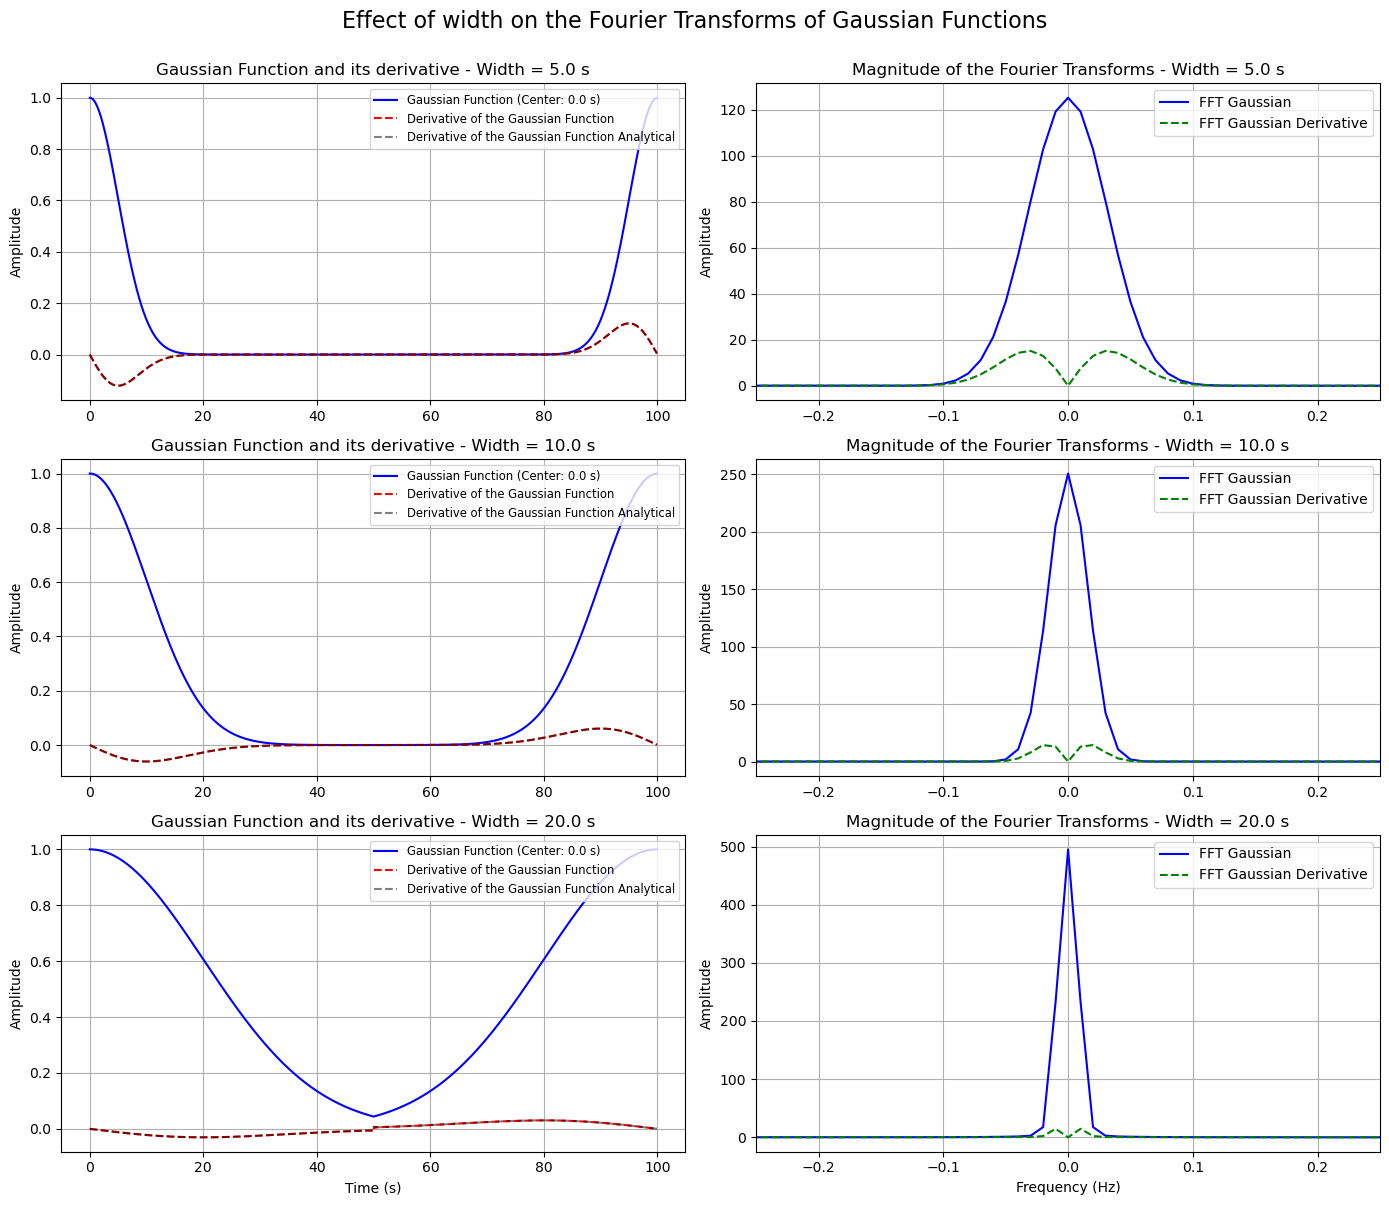

In [13]:
# SIGNAL PARAMETERS
Fs = 10 # Sampling Frequency (Hz)
T = 100.0 # Signal Duration (seconds)
N = int(Fs*T) # Total number of samples
SHIFT = 0.0 # Time shift for the second gate (seconds)

# Time - From 0.0 to T
t = np.linspace(0.0, T, N, endpoint=False) 

# Frequencies
frequencies = np.fft.fftfreq(N, 1/Fs)
frequencies_shifted = np.fft.fftshift(frequencies) # Organize frequencies for a better visualization

# Gates width
gaussian_width = [5.0, 10.0, 20.0] #Sigma Parameter

# Define Gaussian Function
def gaussian_function(t, width = 5.0, center = 0.0):
    a = np.exp(-((t - T/2)**2) / (2 * width**2)) #Gaussian with Amplitud = 1
    b = int((center + T/2)*Fs)
    a = np.roll(a, b)
    return a

def gaussian_deriv_theo(t, width = 0.5, center = 0.0):
    a = (-(t - T/2)/(width**2))*np.exp(-((t - T/2)**2) / (2 * width**2))
    b = int((center + T/2)*Fs)
    a = np.roll(a, b)
    return a


# COMPUTE GAUSSIAN FUNCTIONS AND THEIR FFT
data = [] # To save all the data for each width

for width in gaussian_width:
    # 1. Create original gaussian function (centered at 0.0)
    gaussian = gaussian_function(t, width, center=SHIFT)
    
    # 2. Compute FFT
    
    # 2.1. FFT of the gaussian
    fft_gaussian = np.fft.fft(gaussian)
    fft_gaussian_shifted = np.abs(np.fft.fftshift(fft_gaussian)) # Real part of the FFT

    # 2.2. Fourier transform of the g = f'
    fft_gaussian_deriv = 1j*2*np.pi*frequencies*fft_gaussian
    fft_gaussian_deriv_shifted = np.abs(np.fft.fftshift(fft_gaussian_deriv)) # Real part of the FFT

    # 3. Compute Inverse of FFT g

    ifft_gaussian_deriv = np.real(np.fft.ifft(fft_gaussian_deriv))
    
    # FFT of the shifted gate
    #fft_shifted_gate = np.fft.fft(gate_shifted)
    #fft_shifted_gate_shifted = np.real(np.fft.fftshift(fft_shifted_gate)) # Real part of the FFT

    gaussian_deriv = gaussian_deriv_theo(t, width, center=SHIFT)
    
    # 4. Stores result
    data.append({
        'width': width,
        'gaussian': gaussian,
        'fft_gaussian': fft_gaussian_shifted,
        'fft_gaussian_deriv': fft_gaussian_deriv_shifted,
        'ifft_gaussian_deriv': ifft_gaussian_deriv,
        'gaussian_deriv': gaussian_deriv
    })


# PLOTTING
# Creating the figure with 3 rows (3 widths) and 2 columns (gaussian functions and their FFT)
n_plots = len(gaussian_width)
plt.figure(figsize=(14, 4 * n_plots))

for i, data in enumerate(data):
    width = data['width']
    
    # LEFT HAND SIDE (GATE FUNCTIONS)

    plt.subplot(n_plots, 2, 2*i + 1)
    
    plt.plot(t, data['gaussian'], label=f'Gaussian Function (Center: {0.0} s)', color='blue') # Gaussian Function
    plt.plot(t, data['ifft_gaussian_deriv'], label=f'Derivative of the Gaussian Function', color='red', linestyle='--') # Derivative of the Gaussian
    plt.plot(t, data['gaussian_deriv'], label=f'Derivative of the Gaussian Function Analytical', color='black', linestyle='--', alpha = 0.5) # Derivative of the Gaussian
    #plt.xlim([10, 90]) 
    plt.title(f'Gaussian Function and its derivative - Width = {width} s')
    if i == n_plots - 1: # X label only in the last subplot
        plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend(loc='upper right', fontsize = 'small')
    
    # RIGTH HAND SIDE (FFTs)
    
    plt.subplot(n_plots, 2, 2*i + 2)
    
    plt.plot(frequencies_shifted, data['fft_gaussian'], label=f'FFT Gaussian', color='blue') # FFT of the gaussian
    plt.plot(frequencies_shifted, data['fft_gaussian_deriv'], label=f'FFT Gaussian Derivative', color='green', linestyle='--') # FFT of the shifted gate
    #plt.plot(f, FT_Theo(f, width, 0.0), label='Theoretical FT Original', color='red', linestyle=':') # Theoretical curve original
    #plt.plot(f, FT_Theo(f, width, SHIFT), label='Theoretical FT Shifted', color='black', linestyle=':', alpha = 0.6) # Theoretical curve shifted
    plt.xlim([-0.25, 0.25]) 
    plt.title(f'Magnitude of the Fourier Transforms - Width = {width} s')
    if i == n_plots - 1:
        plt.xlabel('Frequency (Hz)') # X label only in the last subplot
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend(loc='upper right')

    

plt.suptitle('Effect of width on the Fourier Transforms of Gaussian Functions', fontsize=16, y=1)
plt.tight_layout()
plt.savefig('derivative_property')
plt.show()